In [17]:
import tensorflow as tf
from tensorflow import keras
#helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist #load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()#split into testing and training


In [19]:
train_images.shape



(60000, 28, 28)

In [20]:
train_images[0,23,23]#lets look at one pixel

194

In [21]:
train_labels[:10]#lets have a look at our first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

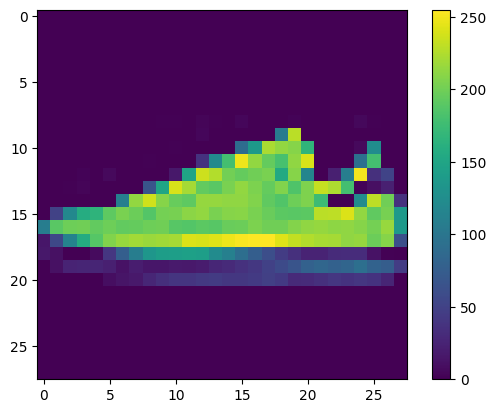

In [23]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
#Preprocess our data this means to transform our data before use 
#In this case we chnage our values to be betwween 0 and 1
train_images=train_images/255.0

test_images=test_images/255.0



In [25]:
#architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#input layer(1)
    tf.keras.layers.Dense(128, activation='relu'),#hidden layer(2)
    tf.keras.layers.Dense(10)#output layer(3) 'we have 10 here as we need a neuron for each class
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [32]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2349 - accuracy: 0.9126


In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3430 - accuracy: 0.8786 - 387ms/epoch - 1ms/step

Test accuracy: 0.878600001335144


313/313 [==============================] - 0s 1ms/step
Sandal


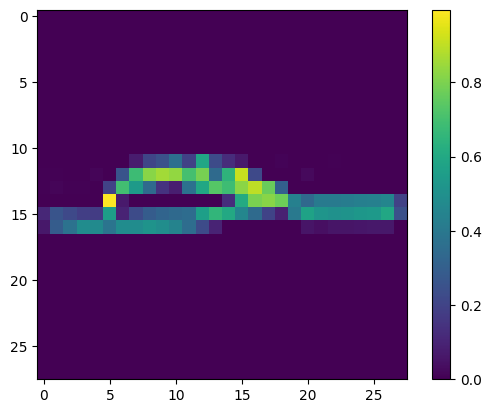

In [40]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images )
print(class_names[np.argmax(predictions[8])])
plt.figure()
plt.imshow(test_images[8])
plt.colorbar()
plt.grid(False)
plt.show()


In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

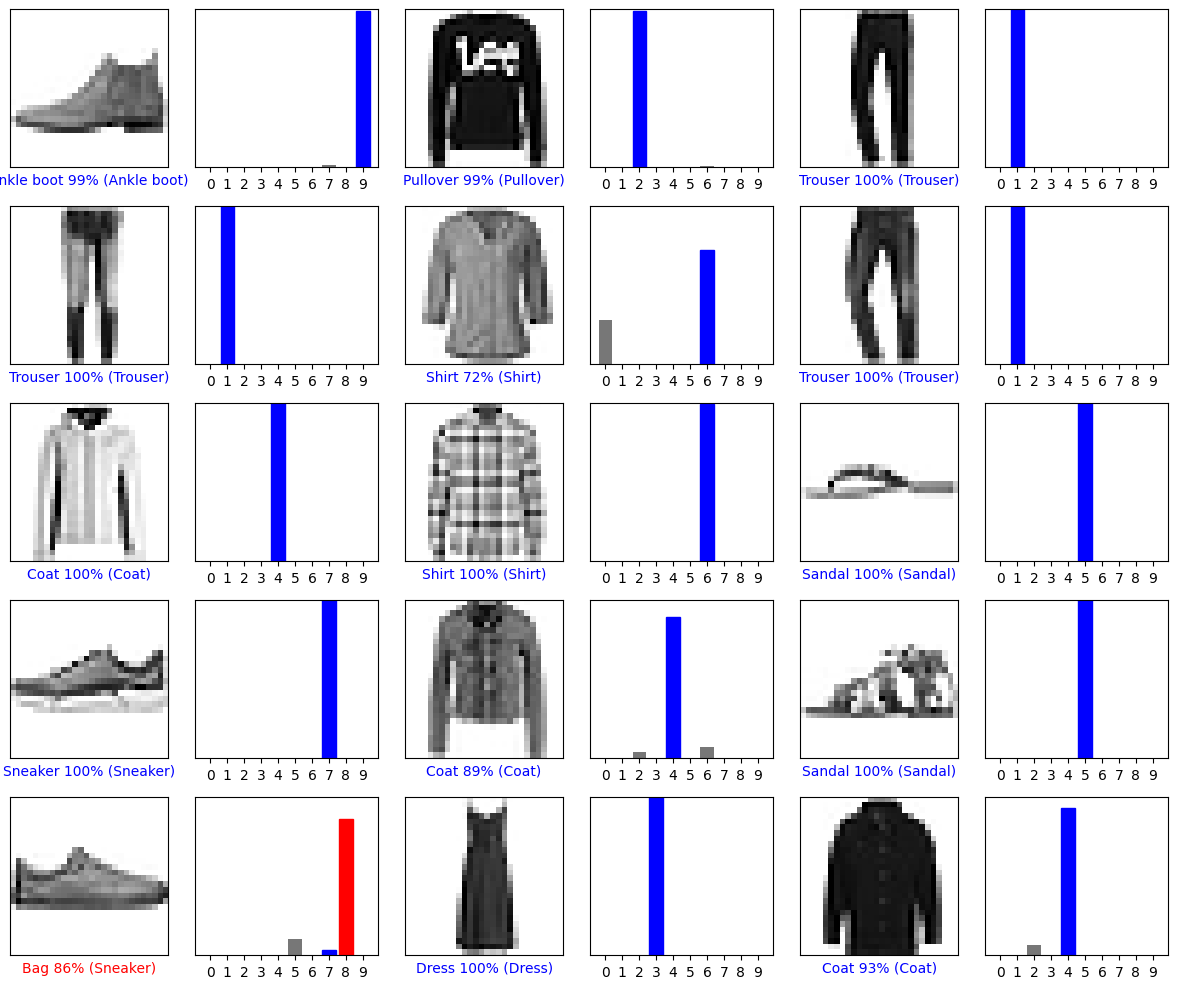

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()